In [1]:
import sofa
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_coordinates(coords, title):
    x0 = coords
    n0 = coords
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')
    q = ax.quiver(x0[:, 0], x0[:, 1], x0[:, 2], n0[:, 0],
                  n0[:, 1], n0[:, 2], length=0.1)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(title)
    return q

## Open and plot HRTF

In [3]:
HRTF_path = "MRT01.sofa"
HRTF = sofa.Database.open(HRTF_path)
HRTF.Metadata.dump()

APIName: ARI SOFA API for Matlab/Octave
APIVersion: 1.0.2
ApplicationName: ITA-Toolbox
ApplicationVersion: 7
AuthorContact: rbo (@akustik.rwth-aachen.de)
Comment: 
Conventions: SOFA
DataType: FIR
DatabaseName: ITA HRTF-database
DateCreated: 20-Oct-2016
DateModified: 2017-08-10 16:13:37
History: R. Bomhardt, M. de la Fuente Klein, and J. Fels: A high-resolution head-related transfer function and three-dimensional ear model database, Proceedings of Meetings on Acoustics 29, 050002 (2016)
License: Creative Commons Attribution-NonCommercial-ShareAlike 4.0 (CC BY-NC-SA 4.0)
ListenerShortName: MRT01
Organization: Institute of Technical Acoustics, RWTH Aachen University
Origin: 
References: R. Bomhardt, M. de la Fuente Klein, and J. Fels: A high-resolution head-related transfer function and three-dimensional ear model database, Proceedings of Meetings on Acoustics 29, 050002 (2016)
RoomDescription: 11m x 5.9m x 4.5m
RoomType: free field
SOFAConventions: SimpleFreeFieldHRIR
SOFAConventionsVers

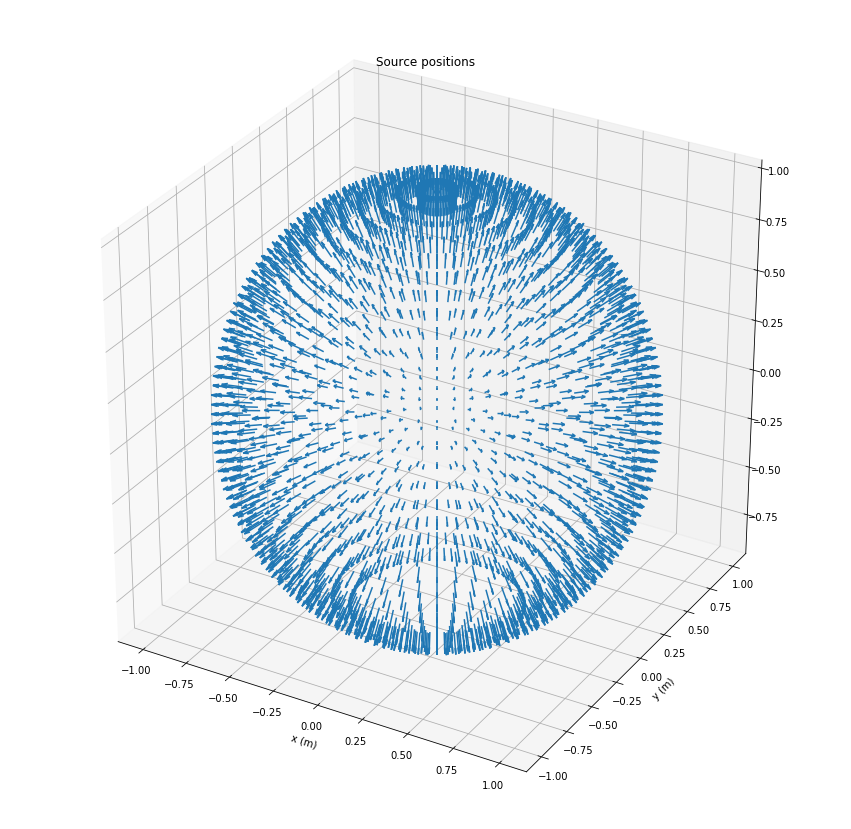

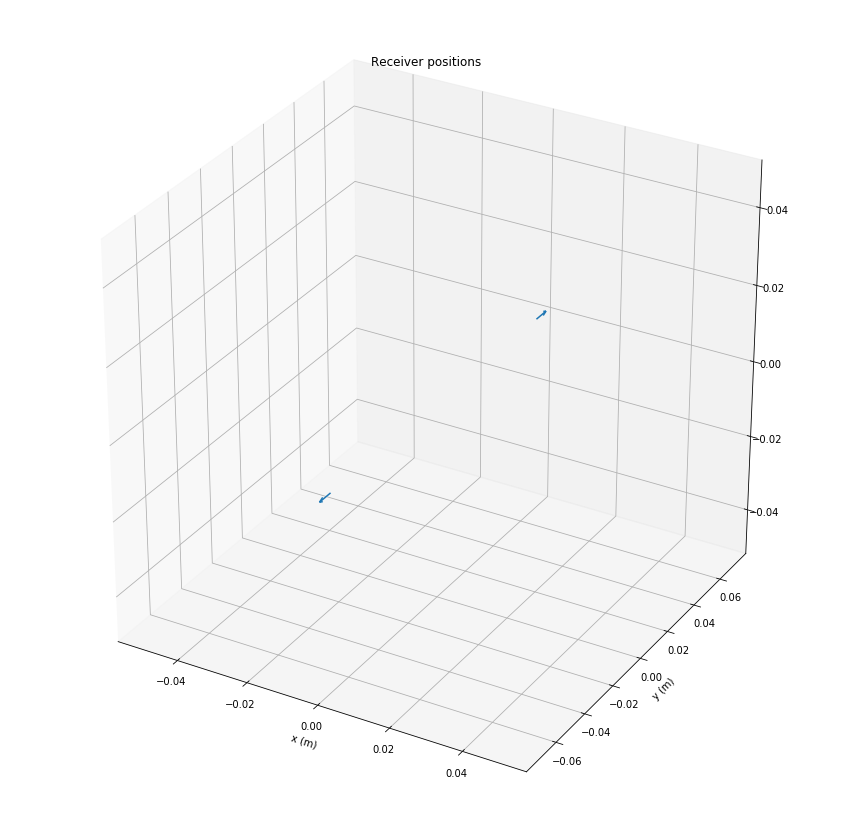

In [4]:
source_positions = HRTF.Source.Position.get_values(system=sofa.spatial.Coordinates.System.Cartesian)
plot_coordinates(source_positions, 'Source positions');

receiver_positions = np.squeeze(HRTF.Receiver.Position.get_global_values(dim_order=("R","M","C"), system=sofa.spatial.Coordinates.System.Cartesian))
plot_coordinates(receiver_positions, 'Receiver positions');

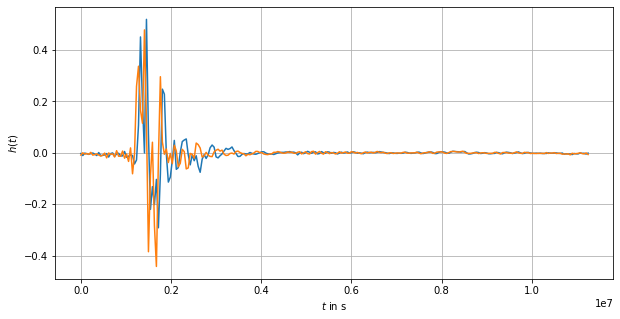

In [5]:
measurement = 5
emitter = 0

t = np.arange(0,HRTF.Dimensions.N)*HRTF.Data.SamplingRate.get_value()

plt.figure(figsize=(10, 5))
for receiver in np.arange(HRTF.Dimensions.R):
    plt.plot(t, HRTF.Data.IR.get_values(indices={"M":measurement, "R":receiver, "E":emitter}))
plt.xlabel('$t$ in s')
plt.ylabel(r'$h(t)$')
plt.grid()

In [6]:
HRTF.close()

## Create new SimpleFreeFieldHRIR .sofa file

SimpleFreeFieldHRIR with fixed Listener and moving Source

In [7]:
HRIR_path = "free_field_HRIR.sofa"
measurement_count = 15

HRIR = sofa.Database.create(HRIR_path, "SimpleFreeFieldHRIR", measurement_count)

HRIR.Listener.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Fixed))
HRIR.Receiver.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Fixed))
HRIR.Source.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Varying))
HRIR.Emitter.initialize(sofa.spatial.Set(sofa.spatial.Coordinates.State.Fixed))

HRIR.Room.initialize()
HRIR.Data.initialize(1000, False)

HRIR.Metadata.dump()
HRIR.Dimensions.dump()

HRIR.close()

Listener count =  1
Receiver count =  2
Source count =  1
Emitter count =  1
APIName: python-SOFA
APIVersion: 0.1
AuthorContact: 
Conventions: SOFA
DataType: FIR
DatabaseName: 
DateCreated: 
DateModified: 
EmitterDescription: 
License: No license provided, ask the author for permission
ListenerDescription: 
ListenerShortName: 
Organization: 
ReceiverDescription: 
RoomType: free field
SOFAConventions: SimpleFreeFieldHRIR
SOFAConventionsVersion: 1.0
SourceDescription: 
Title: 
Version: 1.0
I: 1
C: 3
M: 15
R: 2
E: 1
N: 1000
